In [14]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import t

# Keywords

- Single tailed and two tailed test
- Hypothesis test
- Type I and Type II error

# Formulation of hypothesis

## Two tailed test
We reject the null hypothesis if the sample mean is way above or way below the population mean. In other words, we reject the null hypothesis if the t-statistic is way above or way below 0. Because the rejection region lies in the two side of the t distribution, this type of test is called two tailed test.

 In the t-distribution shown below, the region outside of the red lines is be the rejection region. As you can see, the &alpha; probability is split into two.

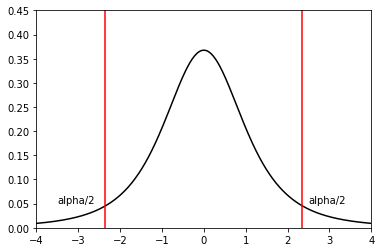

In [15]:
df=3
alpha=0.1

x = np.linspace(-4, 4, 300)
y = t.pdf(x, df)
plt.plot(x, y, 'k')
plt.plot(np.array([t.ppf(alpha/2,df),t.ppf(alpha/2,df)]),np.array([0,1]),color='red')
plt.plot(np.array([-t.ppf(alpha/2,df),-t.ppf(alpha/2,df)]),np.array([0,1]),color='red')
plt.text(-3.5,0.05,"alpha/2")
plt.text(2.5,0.05,"alpha/2")

plt.xlim([-4,4])
plt.ylim([0,0.45])
plt.show()

## Single tailed test

In contrast to two tailed test, the whole &alpha; probability is found in one side of the t-distribution in the case of single tailed test.

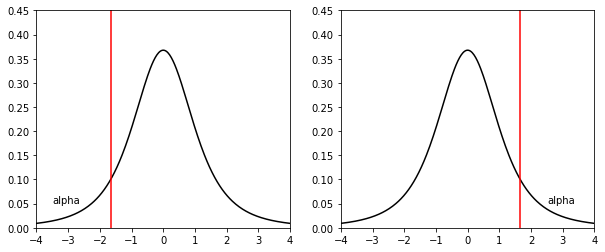

In [21]:
df=3
alpha=0.1

x = np.linspace(-4, 4, 300)
y = t.pdf(x, df)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(x, y, 'k')
plt.plot(np.array([t.ppf(alpha,df),t.ppf(alpha,df)]),np.array([0,1]),color='red')
plt.text(-3.5,0.05,"alpha")
plt.xlim([-4,4])
plt.ylim([0,0.45])

plt.subplot(122)
plt.plot(x, y, 'k')
plt.plot(np.array([-t.ppf(alpha,df),-t.ppf(alpha,df)]),np.array([0,1]),color='red')
plt.text(2.5,0.05,"alpha")
plt.xlim([-4,4])
plt.ylim([0,0.45])

plt.show()

# Procedure of the hypothesis test

The hypothesis testing is conducted in the following way:
- Formulate hypothesis
- Calculate the t-statistic
- Cutoff values for the t-statistic
- Check whether the t-statistic is within the rejection region

## Formulating hypothesis
### Hypothesis
The claim that you want to test is called <strong>null hypothesis</strong>. The remaining part is <strong>alternative hypothesis</strong>.

It should be noted that the null hypothesis cannot have 
$$
\neq, >, <.
$$
It can only have
$$
=, \geq, \leq.
$$
If your null hypothesis is initially set as  
H<sub>0</sub>: &mu; < 3.0,  
then you should rewrite it as  
H<sub>0</sub>: &mu; => 3.0.

### Parameters used for calculation
- Null hypothesis H<sub>0</sub>: &mu; => 3.0
- Alternative hypothesis H<sub>A</sub>: &mu; < 3.0

$$
n=150, \bar{x}=2.9, s=1.35 
$$

## Calculation of the t-statistic

In [41]:
# calculate the t-statistic 

x_bar=2.9 # sample mean
n = 150 # number of samples
s = 1.35 # sample standard deviation
mu = 3 # claimed population mean

t_sta=( x_bar - mu )/(s/np.sqrt(n))
t_sta

-0.9072184232530297

## Cutoff values for the t-statistic

In [31]:
# cutoff values for the t-statistic

alpha = 0.05

t_cutoff = -np.abs(t.ppf(alpha, df=n-1)) # cutoff value
t_cutoff

-1.6551445337953004

Recall that our null hypothesis is   
H<sub>0</sub>: &mu; => 3.0.   
This means that the cutoff lies on the left side of the t-distribution.

## Final check

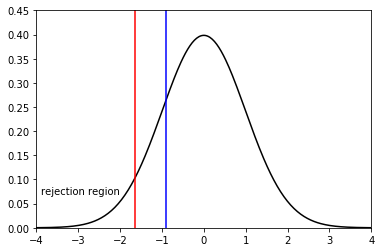

In [40]:
# 
x = np.linspace(-4, 4, 300)
y = t.pdf(x, df=n-1)

plt.plot(x, y, 'k')
plt.plot(np.array([t_cutoff,t_cutoff]),np.array([0,1]),color='red')
plt.plot(np.array([t_sta,t_sta]),np.array([0,1]),color='blue')

plt.text(-3.9,0.07,"rejection region")

plt.xlim([-4,4])
plt.ylim([0,0.45])
plt.show()

The t-statistic (blue line) does not lie in the rejection region (left side of the red line). Hence, we do not reject the null hypothesis. 

# Hypothesis test for proportions

## Formulate hypothesis

H<sub>0</sub>: p => 0.70  
H<sub>A</sub>: p < 0.70

## z-statistic

$$
z-statistic = \frac{\bar{p}-p}{\sqrt{\frac{p(1-p)}{n}}}
$$
- p_bar: sample proportion
- p: hypothesis population proportion
- n: sample size

In [57]:
from scipy.stats import norm

n = 750 # sample size
p_bar=0.68 # sample proportion
p = 0.7 # hypothesis population proportion

z_statistic= (p_bar-p)/np.sqrt(p*(1-p)/n)
z_statistic

-1.195228609334388

The following conditions should be satisfied:
$$
n\bar{p}>5
$$
and
$$
n(1-\bar{p})>5
$$


In [56]:
print("n * p_bar: ",p_bar*n)
print("n*(1-p_bar): ",n*(1-p_bar))

n * p_bar:  510.00000000000006
n*(1-p_bar):  239.99999999999997


## Cutoff value

In [48]:
alpha=0.05
z_cutoff = -np.abs(norm.ppf(alpha))
z_cutoff

-1.6448536269514729

## Final check

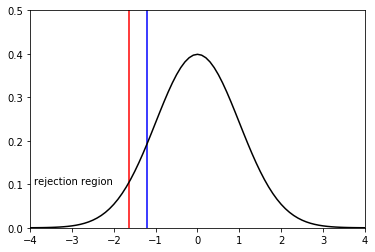

In [52]:
def standard_norm_pdf(x): 
    return np.exp(-0.5 * x**2 )/np.sqrt(2*np.pi)

x = np.linspace(-5,5,101)

plt.plot(np.array([z_cutoff,z_cutoff]),np.array([0,1]),color='red')
plt.plot(np.array([z_statistic,z_statistic]),np.array([0,1]),color='blue')
plt.plot(x,standard_norm_pdf(x), 'k')
plt.xlim([-4,4])
plt.ylim([0,0.5])
plt.text(-3.9,0.1,'rejection region')
plt.show()

The z-statistic does not lie in the rejection region. 

# Type I and Type II errors in a hypothesis test

## Type I error
Rejecting the null hypothesis when it is true.

## Type II error
Not rejecting the null hypothesis when it is false.

## Reduction of the probability of type I and type II errors
- Probability of type I error is changed by adjusting &alpha;.

- Probability of type II error can be reduced by taking a larger sample size.